<a href="https://colab.research.google.com/github/jmontalvo94/02456_l2rpn/blob/main/DQN_playground_emil_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
%cd /content/drive/My\ Drive/Colab\ Notebooks/DEEP_LEARNING_DTU/project/\02456_l2rpn/
#!git pull
!pip install grid2op

import agent
import grid2op
import re
import numpy as np
import pandas as pd
from grid2op.Chronics import GridStateFromFileWithForecasts
from grid2op.Agent import DoNothingAgent,RandomAgent,PowerLineSwitch
from grid2op.Action import DontAct,PowerlineChangeAction
from grid2op.PlotGrid import PlotMatplot
from tqdm.notebook import tqdm 

/content/drive/My Drive/Colab Notebooks/DEEP_LEARNING_DTU/project/02456_l2rpn


# CREATE ENVIROMENT

In [7]:
env = grid2op.make('rte_case14_realistic',
                   action_class=PowerlineChangeAction)

# PRE-BUILT AGENT: DO NOTHING AGENT

In [9]:
my_agent = DoNothingAgent(env.action_space)
all_obs = []
obs = env.reset()
all_obs.append(obs)
reward = env.reward_range[0]
reward_list = []
done = False
nb_step = 0
print("Do Nothing Agent Simulation")
with tqdm(total=env.chronics_handler.max_timestep()) as pbar:
    while True:
        action = my_agent.act(obs, reward, done)
        obs, reward, done, _ = env.step(action)
        reward_list.append(reward)
        pbar.update(1)
        if done:
            break
        all_obs.append(obs)
        nb_step += 1

reward_list_do_nothing_agent = np.copy(reward_list)


Do Nothing Agent Simulation


# PRE-BUILT AGENT: RANDOM ACTION AGENT

In [12]:
my_agent = RandomAgent(env.action_space)
all_obs = []
obs = env.reset()
all_obs.append(obs)
reward = env.reward_range[0]
reward_list = []
done = False
nb_step = 0
print("Random Agent Simulation")
with tqdm(total=env.chronics_handler.max_timestep()) as pbar:
    while True:
        action = my_agent.act(obs, reward, done)
        obs, reward, done, _ = env.step(action)
        reward_list.append(reward)
        pbar.update(1)
        if done:
            break
        all_obs.append(obs)
        nb_step += 1

reward_list_random_agent = np.copy(reward_list)


Random Agent Simulation


# PRE-BUILT AGENT: POWER SWITCH AGENT

In [15]:
env_all_actions_available = grid2op.make('rte_case14_realistic')
my_agent = PowerLineSwitch(env_all_actions_available.action_space)
all_obs = []
obs = env_all_actions_available.reset()
all_obs.append(obs)
reward = env_all_actions_available.reward_range[0]
reward_list = []
done = False
nb_step = 0
print("Power Line Switch Agent Simulation")
with tqdm(total=env_all_actions_available.chronics_handler.max_timestep()) as pbar:
    while True:
        action = my_agent.act(obs, reward, done)
        obs, reward, done, _ = env_all_actions_available.step(action)
        reward_list.append(reward)
        pbar.update(1)
        if done:
            break
        all_obs.append(obs)
        nb_step += 1

reward_power_line_switch_agent = np.copy(reward_list)


Power Line Switch Agent Simulation


# GRAPHICAL COMPARISON OF PRE-BUILT AGENTS

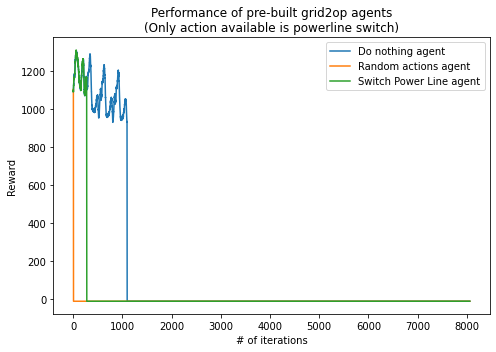

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

nested_lists = [reward_list_do_nothing_agent,reward_list_random_agent,reward_power_line_switch_agent]
lists_to_df  = []

for nested_list in  nested_lists:
  len_list = len(nested_list)
  final_value = nested_list[-1]
  list_ = np.repeat(final_value,env.chronics_handler.max_timestep())
  list_[:len_list] = nested_list
  lists_to_df.append(list_)

df_pre_built_agents = pd.DataFrame(lists_to_df)\
.transpose()\
.rename(columns={0:'do_nothing_agent',1:'random_agent',2:'switch_power_line_agent'})\
.stack()\
.reset_index()\
.rename(columns={'level_0':'iteration','level_1':'agent_type',0:'reward'})\



fig,ax = plt.subplots(1,1,figsize=(7,5))
sns.lineplot(x='iteration',y='reward',hue='agent_type',ax=ax,data=df_pre_built_agents)
ax.set_xlabel("# of iterations")
ax.set_ylabel("Reward")
ax.set_title("Performance of pre-built grid2op agents\n(Only action available is powerline switch)")
ax.legend(['Do nothing agent','Random actions agent','Switch Power Line agent'])
plt.tight_layout()
plt.show()
# df_pre_built_agents = pd.DataFrame({'random_agent':reward_list_random_agent,
#                                     'power_line_switch_agent':reward_power_line_switch_agent
#                                     })
# df_pre_built_agents